In [281]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.integrate import cumulative_trapezoid
from scipy.special import ellipe



# Replication of Nadeem et al. (2022): Peristaltic Flow in an Elliptic Duct
**Author:** Ashiful Bhuiyan

**Supervisor:** Md Abdur Rahman

**Date:** January 2026

**Reference:** Nadeem, S., et al. (2022). "Analysis of heat and mass transfer on the peristaltic flow in a duct with sinusoidal walls: Exact solutions of coupled PDEs." *Alexandria Engineering Journal*.

## 1. Introduction

This notebook presents a computational replication of the analytical results derived by Nadeem et al. (2022) in their study: "*Analysis of heat and mass transfer on the peristaltic flow in a duct with sinusoidal walls*", to validate exact solutions in an elliptical geometry.


### 1.1 The Physical Setup

We consider the flow of a viscous, incompressible fluid driven by the sinusoidal motion of the duct walls. The problem involves Mixed Convection, where the flow field is coupled to both thermal and concentration gradients: 

- Thermal Buoyancy: Fluid density variations driven by temperature differences ($G_t$).
- Solutal Buoyancy: Density variations driven by species concentration gradients ($G_c$).
- Soret Effect: A cross-diffusion phenomenon where a temperature gradient induces a concentration flux.


### 1.2 Mathematical Formulation & Approximations

We have the following equations:

1. Momentum Equation:
The axial velocity $w$ is driven by the pressure gradient and buoyancy forces (mixed convection):
$$\nabla^2 w = \frac{dp}{dz} - G_t \theta - G_c \sigma$$

2. Energy Equation:
The temperature field $\theta$ is governed by a constant internal heat source parameter $\gamma$: 
$$\nabla^2 \theta = -\gamma$$

3. Concentration Equation:
The species concentration $\sigma$ is coupled to the temperature field via the Soret term (thermodiffusion):

$$\nabla^2 \sigma = -Sc \cdot Sr \cdot \nabla^2 \theta$$

This linear system allows for exact polynomial solutions that satisfy the Dirichlet boundary conditions at the duct walls.

### 1.3 The Explicit Analytical Solutions

The notebook solves these PDEs on an elliptical cross-section defined by $\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1$. The solutions are polynomials that vanish at the boundary:

- Temperature Solution:

$$\theta(x,y) = \frac{\gamma a^{2}b^{2}}{2(a^{2}+b^{2})} \left(1 - \frac{x^{2}}{a^{2}} - \frac{y^{2}}{b^{2}} \right)$$

- Concentration Solution:
$$\sigma(x,y) = -\frac{\gamma S_{c}S_{r}a^{2}b^{2}}{2(a^{2}+b^{2})} \left(1 - \frac{x^{2}}{a^{2}} - \frac{y^{2}}{b^{2}} \right)$$

- Velocity Solution: The velocity is expressed as a factorized form separating the geometry from the driving forces:

$$w(x,y) = \left[ \frac{-a^{2}b^{2}(\frac{x^{2}}{a^{2}}+\frac{y^{2}}{b^{2}}-1)}{2(a^{2}+b^{2})} \right] \times \left( G_{t}\theta + G_{c}\sigma - \frac{dp}{dz} \right) - 1$$


### 1.4. Coordinate Transformation (The "Wave Frame")
The problem is unsteady in the lab frame (with moving walls). To render it steady, we transform to a frame co-moving with the wave speed $  c  $:

* **Lab Frame**: $(X, Y, Z, t)$ -> Walls move, wave travels at speed $c$.
* **Wave Frame**: $(x, y, z)$ -> Wave is stationary, walls move backwards at speed $-c$.

* **Boundary**: Defined by the ellipse equation $\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1$

**Boundary Conditions in Wave Frame:**
At the wall, the fluid moves with the wall:
$$w_{boundary} = -1 \quad (\text{Dimensionless})$$

### 1.5 Geometry Implementation
To model the elliptical duct walls as described in Nadeem et al. (2022), we define the semi-axes $a(z)$ and $b(z)$ using the aspect ratio $\delta$ and wave amplitude $\phi$. This function incorporates the complete elliptic integral of the second kind for precise normalization (Eq. 6 in the paper).

In [282]:
# Configure Plot Styles
plt.style.use('default')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

# --- Geometry Definition ---
# The wall is defined by an ellipse with semi-axes a(z) and b(z).
# a(z) = a0 + d * sin(2*pi*z)
# In the paper, they use parameters 'delta' (aspect ratio) and 'phi' (wave amplitude).


def get_geometry(z, delta=0.7, phi=0.4): #better approximation using scipy.ellipe
    """
    Calculates the semi-major (a) and semi-minor (b) axes of the ellipse.
    """
    e_squared = 1 - delta**2
    
    #  Elliptic Integral of the 2nd Kind E(e)
    E_e = ellipe(e_squared)
    
    #  Wall Dimensions 
    
    term = phi * np.sin(2 * np.pi * z)
    normalization = E_e / np.pi
    
    a = normalization * (1/delta + term)
    b = normalization * (1 + term)
    
    return a, b

# Quick test with sample z values
sample_z = np.linspace(0, 1, 5)  
a, b = get_geometry(sample_z)
print("z:", sample_z)
print("a(z):", a)
print("b(z):", b)

z: [0.   0.25 0.5  0.75 1.  ]
a(z): [0.61187902 0.78320515 0.61187902 0.44055289 0.61187902]
b(z): [0.42831531 0.59964144 0.42831531 0.25698919 0.42831531]


## 2. Heat and Mass Transfer Solutions

Under the **long-wavelength and low-Reynolds-number** assumptions, the governing equations for Temperature ($\theta$) and Concentration ($\sigma$) simplify to Poisson equations:

### 2.1 Temperature
$$\frac{\partial^2 \theta}{\partial x^2} + \frac{\partial^2 \theta}{\partial y^2} = -\gamma$$
* Boundary Condition: $\theta = 0$ at the wall.
* **Solution:** A parabolic profile that vanishes at the elliptical boundary.
$$\theta(x,y) = \frac{\gamma a^2 b^2}{2(a^2+b^2)} \left( 1 - \frac{x^2}{a^2} - \frac{y^2}{b^2} \right)$$

### 2.2 Concentration
$$\frac{\partial^2 \sigma}{\partial x^2} + \frac{\partial^2 \sigma}{\partial y^2} = -Sc \cdot Sr \cdot \nabla^2 \theta$$
* **Soret Effect:** The term on the RHS shows that temperature curvature drives concentration.
* **Solution:** It mirrors the temperature profile, with a sign flip due to the Soret coupling.
$$\sigma(x,y) = -\frac{\gamma S_c S_r a^2 b^2}{2(a^2+b^2)} \left( 1 - \frac{x^2}{a^2} - \frac{y^2}{b^2} \right)$$

### 2.3 Analytical Implementation
The following functions compute $\theta$ and $\sigma$ on a grid:

In [283]:
def get_analytical_temperature(x, y, a, b, gamma):
    """Calculates dimensionless temperature field."""
    shape = 1.0 - (x**2 / a**2 + y**2 / b**2)
    
    coeff = (gamma * a**2 * b**2) / (2 * (a**2 + b**2))
    theta = coeff * shape
    
    mask = shape < 0
    theta[mask] = np.nan 
    return theta

def get_analytical_concentration(x, y, a, b, gamma, Sc, Sr):
    """Calculates dimensionless concentration field."""
    shape = 1.0 - (x**2 / a**2 + y**2 / b**2)
    
    coeff = -(Sc * Sr * gamma * a**2 * b**2) / (2 * (a**2 + b**2))
    sigma = coeff * shape
    
    mask = shape < 0
    sigma[mask] = np.nan
    return sigma

# Quick test: Sample points (mix inside/outside)
x_test = np.array([0.0, 0.5, 1.0, 1.5])
y_test = np.array([0.0, 0.3, 0.5, 0.8])
a, b, gamma, Sc, Sr = 1.0, 0.7, 1.0, 1.0, 1.0

theta_test = get_analytical_temperature(x_test, y_test, a, b, gamma)
sigma_test = get_analytical_concentration(x_test, y_test, a, b, gamma, Sc, Sr)

print("Theta:", theta_test)  # Expected: positive inside, NaN outside
print("Sigma:", sigma_test)  # Expected: negative inside, NaN outside

Theta: [0.16442953 0.09312081        nan        nan]
Sigma: [-0.16442953 -0.09312081         nan         nan]


## 3. The Velocity Field

This section implementation for the Velocity Field, combines M. A. Abdur's factorized solution with a method to calculate the pressure gradient $\frac{dp}{dz}$ from the Flow Rate $(Q)$. 

The velocity of the fluid, $w(x,y)$, is driven by three coupled forces:
1. Pressure Gradient: $\frac{dp}{dz}$ is the primary driving force of the Poiseuille flow.
2. Thermal Buoyancy: Convection induced by density variations due to temperature gradients ($G_t \theta$); think of this as heat lifting the fluid.
3. Concentration Buoyancy: Convection driven by species concentration gradients ($G_c \sigma$).

Instead of the 4th-order polynomial in the paper (Eq 22), we use the Factorized Form (courtesy of M. A. Abdur). This separates the geometry from the physics:

$$w(x,y) = \underbrace{\left[ \frac{-a^2 b^2 (\frac{x^2}{a^2} + \frac{y^2}{b^2} - 1)}{2(a^2 + b^2)} \right]}_{\text{Geometric Factor } K} \times \underbrace{\left( G_t \theta + G_c \sigma - \frac{dp}{dz} \right)}_{\text{Driving Forces}} - 1$$

**Boundary Check**: At the wall, the geometric factor becomes 0, leaving $w = -1$, which satisfies the boundary condition perfectly.

## 3.1 Determination of the Pressure Gradient $\frac{dp}{dz}$:

The problem is formulated with a prescribed Flow Rate ($Q$) as the control parameter. Since the pressure gradient ($dp/dz$) is the unknown driving force required to maintain this flux, we must invert the integral constraint: 

$$Q = \iint w \, dA$$

Substituting our velocity equation into this integral and rearranging for $\frac{dp}{dz}$ gives:

$$\frac{dp}{dz} = \frac{\iint K(G_t \theta + G_c \sigma) dA - (\pi a b + Q)}{\iint K dA}$$

(where $K$ is the geometric factor defined above)

### 3.2 Velocity Implementation
The following functions compute $w(x,y)$ using the factorized form and invert for $\frac{dp}{dz}$ via numerical integration over the grid.

In [284]:
def get_velocity_field(x, y, z, params, theta_field, sigma_field, dp_dz):
    """
    Calculates velocity field w(x,y) using Abdur's Factorized Form.
    
    Parameters:
    x, y        : Grid arrays
    z           : Current axial position (float)
    params      : Dictionary of physical parameters (Gt, Gc, etc.)
    theta_field : Pre-calculated temperature field
    sigma_field : Pre-calculated concentration field
    dp_dz       : Pressure gradient value at this z
    
    Returns:
    w           : Velocity field w(x,y)
    """
    a, b = get_geometry(z, params['delta'], params['phi'])
    
    shape_term = (x**2 / a**2) + (y**2 / b**2) - 1.0
    numerator = -1.0 * (a**2) * (b**2) * shape_term
    denominator = 2.0 * (a**2 + b**2)
    
    geometric_factor = numerator / denominator
    
    driving_force = (params['Gt'] * theta_field) + \
                    (params['Gc'] * sigma_field) - \
                    dp_dz
    
    w = (geometric_factor * driving_force) - 1.0
    
    # Mask values outside the ellipse
    w[shape_term > 0] = np.nan
    
    return w

def get_velocity_solution(x, y, z, Q, params, theta, sigma):
    """
    Solves for dp/dz and returns the full velocity field w(x,y).
    """
    a, b = get_geometry(z, params['delta'], params['phi'])
    

    shape_term = (x**2 / a**2) + (y**2 / b**2) - 1.0
    
    numerator = -1.0 * (a**2) * (b**2) * shape_term
    denominator = 2.0 * (a**2 + b**2)
    K = numerator / denominator
    
    mask = shape_term > 0
    K[mask] = 0
    
    # Convert NaNs in the input fields to 0.0 so integration doesn't fail.
    # We create copies to avoid modifying the original arrays
    theta_clean = np.nan_to_num(theta, nan=0.0)
    sigma_clean = np.nan_to_num(sigma, nan=0.0)
    
    #Numerical Integration to find dp/dz
    dx = x[0,1] - x[0,0]
    dy = y[1,0] - y[0,0]
    dA = dx * dy
    
    # Term 1: Integral of Geometry
    int_K = np.sum(K) * dA
    
    # Term 2: Integral of Buoyancy Forces
    # Using the clean variables prevents 0 * nan = nan errors
    buoyancy_term = params['Gt'] * theta_clean + params['Gc'] * sigma_clean
    int_buoyancy = np.sum(K * buoyancy_term) * dA
    
    # Term 3: Frame Shift Correction (Area of ellipse)
    area_ellipse = np.pi * a * b
    
    # Solve for dp/dz
    # Avoid division by zero if int_K is extremely small
    if abs(int_K) < 1e-12:
        dp_dz = 0 
    else:
        dp_dz = (int_buoyancy - area_ellipse - Q) / int_K
    
    driving_force = buoyancy_term - dp_dz
    w = (K * driving_force) - 1.0
    
    w[mask] = np.nan
    
    return w, dp_dz

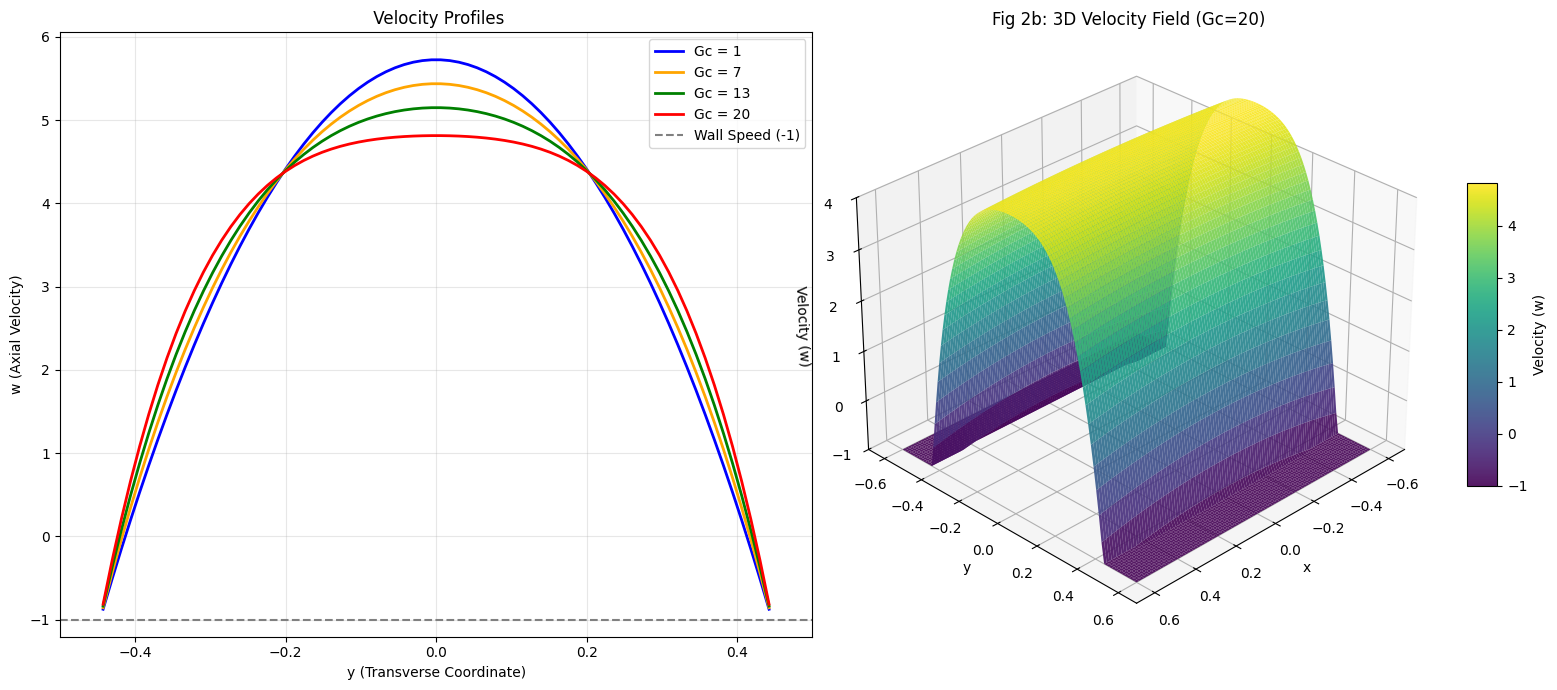

In [285]:
base_params = {
    'delta': 0.1, 'phi': 0.4, 'gamma': 2.0,
    'Gt': 0.1, 'Sc': 3.0, 'Sr': 4.0,
    'Gc': 1.0 
}

Q_target = 0.1
z_loc = 0.2
x_slice_val = 0.01 

# Grid
N = 100
limit = 0.6 # Tighten the view slightly
y_vals = np.linspace(-limit, limit, N)
x_vals = np.linspace(-limit, limit, N)
X, Y = np.meshgrid(x_vals, y_vals)


fig = plt.figure(figsize=(16, 7))

# LEFT PLOT: 2D Velocity Profiles
ax1 = fig.add_subplot(1, 2, 1)
Gc_values = [1, 7, 13, 20]
colors = ['blue', 'orange', 'green', 'red']

# Pre-calculate Geometry
a, b = get_geometry(z_loc, base_params['delta'], base_params['phi'])
x_idx = np.abs(x_vals - x_slice_val).argmin()

for Gc, color in zip(Gc_values, colors):
    current_params = base_params.copy()
    current_params['Gc'] = Gc
    
    # Calculate Fields
    theta = get_analytical_temperature(X, Y, a, b, current_params['gamma'])
    sigma = get_analytical_concentration(X, Y, a, b, current_params['gamma'], 
                                       current_params['Sc'], current_params['Sr'])
    
    # Solve Velocity
    w, dp_dz = get_velocity_solution(X, Y, z_loc, Q_target, current_params, theta, sigma)
    
    # Plot Slice
    ax1.plot(y_vals, w[:, x_idx], label=f'Gc = {Gc}', color=color, linewidth=2)

ax1.axhline(-1, color='gray', linestyle='--', label='Wall Speed (-1)')
ax1.set_xlabel('y (Transverse Coordinate)')
ax1.set_ylabel('w (Axial Velocity)')
ax1.set_title(' Velocity Profiles')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlim(-0.5, 0.5)

#RIGHT PLOT: 3D Velocity Field
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

# Generate Data for Gc=20
current_params = base_params.copy()
current_params['Gc'] = 20
theta = get_analytical_temperature(X, Y, a, b, current_params['gamma'])
sigma = get_analytical_concentration(X, Y, a, b, current_params['gamma'], 
                                   current_params['Sc'], current_params['Sr'])
w_3d, _ = get_velocity_solution(X, Y, z_loc, Q_target, current_params, theta, sigma)


w_plot = np.nan_to_num(w_3d, nan=-1.0) 
surf = ax2.plot_surface(X, Y, w_plot, cmap=cm.viridis, 
                       edgecolor='none', alpha=0.9, rstride=1, cstride=1)

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('Velocity (w)')
ax2.set_title('Fig 2b: 3D Velocity Field (Gc=20)')

# Adjust view angle
ax2.view_init(elev=30, azim=45) 
ax2.set_zlim(-1.0, 4.0)

fig.colorbar(surf, ax=ax2, shrink=0.5, aspect=10, label='Velocity (w)')

plt.tight_layout()
plt.show()

## 4. Visualization of Coupled Transport Phenomena
 
Now we can visualize how the thermal, solutal and pressure fields interact, so we replicate Figures 7, 9, and 11 from Nadeem et al. (2022).

### 4.1 Temperature Distributions (Figures 7a & 7b)
Starting with the dimensionless temperature field $\theta$, which we modeled here as a Poisson equation ($\nabla^2 \theta = -\gamma$) with zero boundaries. The heat source $\gamma$ directly amps up the profile's height. This is expected behavior in a system with constant internal heating.

For the visualizations we have:

* **2D Cross-Section (Fig 7a):** We have the transverse slice along the y-axis through the center. Hiigher $\gamma$ values push the the peak of the parabola accordingly. This illustrates how stronger heating amplifies the thermal gradients.

### 4.2 Concentration Profiles (Figures 9a & 9b)
For the mass concentration field ($\sigma$), the Soret effect couples to the temperature through the source term $\nabla^2 \sigma \propto -\nabla^2 \theta$. This flips the curvature giving concentration a concave-up profile.  


* **Fig 9a:** We examine the effect of the Schmidt Number ($S_c$) here, which represents the ratio of momentum diffusivity to mass diffusivity. A higher $S_c$ implies slower mass diffusion relative to viscous effects, resulting in steeper concentration gradients and a deeper minimum at the duct center.

### 4.3 Axial Pressure Gradient (Figures 11a, 11b, 11c)
Finally, we analyze the driving forces required to maintain the flow. The axial pressure gradient ($dp/dz$) is non-constant, varying continuously with the cross-sectional area $A(z)$ due to the peristaltic motion of the walls, which is what we expect.


Since $Q$ is fixed, we can invert the integral constraint at each $z$ by first computing the geometry, then integrating the thermal and solutal buoyancy contributions and then finally solving for the balancing $dp/dz$ to hit the taget flux.


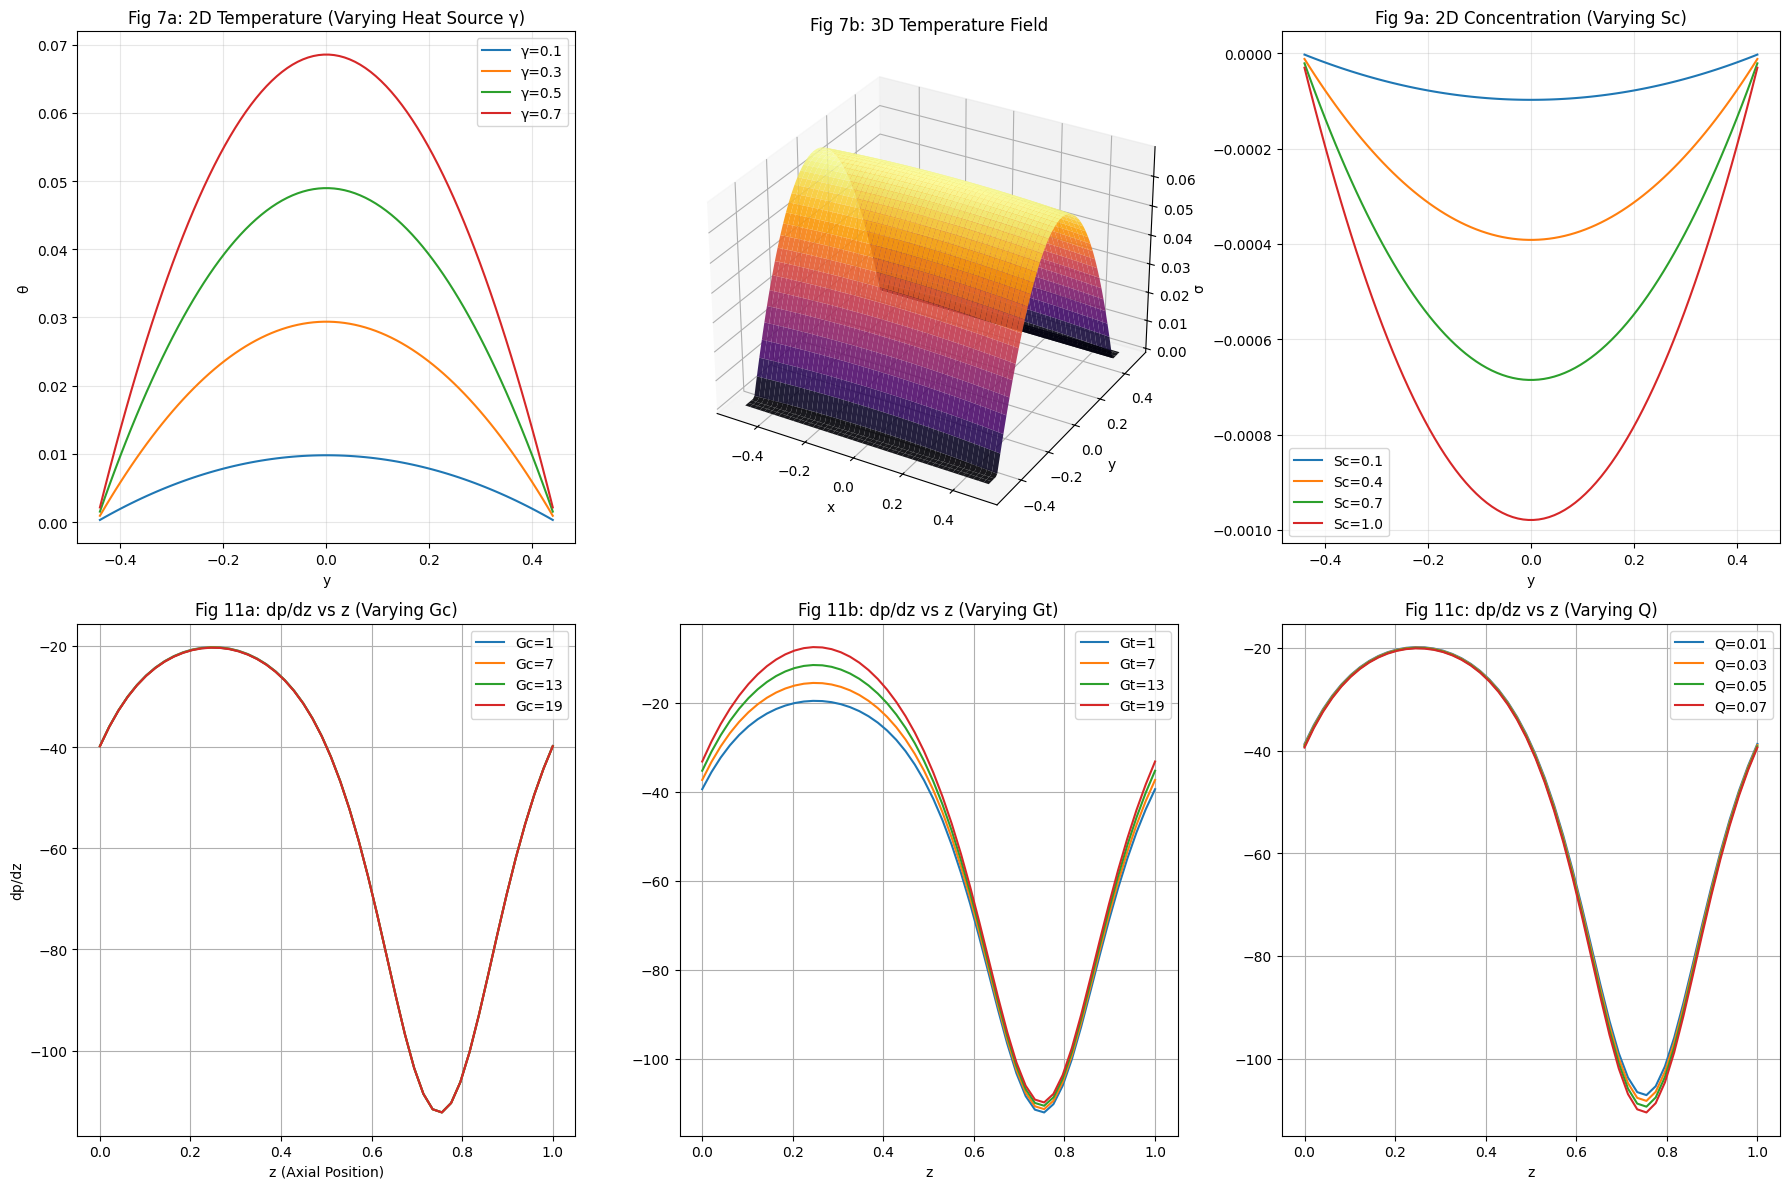

In [286]:
def get_geometry(z, delta=0.7, phi=0.4):
    """Calculates semi-axes a and b at position z using exact elliptic integral."""
    e_squared = 1 - delta**2
    E_e = ellipe(e_squared)
    term = phi * np.sin(2 * np.pi * z)
    normalization = E_e / np.pi
    a = normalization * (1/delta + term)
    b = normalization * (1 + term)
    return a, b

def get_analytical_temperature(x, y, a, b, gamma):
    """Calculates dimensionless temperature field (Hill shape)."""
    shape = 1.0 - (x**2 / a**2 + y**2 / b**2)
    coeff = (gamma * a**2 * b**2) / (2 * (a**2 + b**2))
    theta = coeff * shape
    mask = shape < 0
    theta[mask] = np.nan 
    return theta

def get_analytical_concentration(x, y, a, b, gamma, Sc, Sr):
    """Calculates dimensionless concentration field (Bowl shape)."""
    shape = 1.0 - (x**2 / a**2 + y**2 / b**2)
    # Note: The negative sign here creates the "bowl" shape (negative concentration)
    # consistent with the physics of the Soret effect in this setup.
    coeff = -(Sc * Sr * gamma * a**2 * b**2) / (2 * (a**2 + b**2))
    sigma = coeff * shape
    mask = shape < 0
    sigma[mask] = np.nan
    return sigma

def calculate_dp_dz(z, Q, params):
    """
    Calculates dp/dz at a specific z location by integrating the velocity equation.
    Rearranges Q = Integral(w dA) to solve for dp/dz.
    """
    a, b = get_geometry(z, params['delta'], params['phi'])
    
    N = 100
    limit_x = a * 1.1
    limit_y = b * 1.1
    x_vals = np.linspace(-limit_x, limit_x, N)
    y_vals = np.linspace(-limit_y, limit_y, N)
    X, Y = np.meshgrid(x_vals, y_vals)
    dx = x_vals[1] - x_vals[0]
    dy = y_vals[1] - y_vals[0]
    dA = dx * dy
    
    # Geometric Factor K
    shape_term = (X**2 / a**2) + (Y**2 / b**2) - 1.0
    numerator = -1.0 * (a**2) * (b**2) * shape_term
    denominator = 2.0 * (a**2 + b**2)
    K = numerator / denominator
    
    # Masking outside ellipse
    mask = shape_term > 0
    K[mask] = 0.0
    
    theta = np.nan_to_num(get_analytical_temperature(X, Y, a, b, params['gamma']), nan=0.0)
    sigma = np.nan_to_num(get_analytical_concentration(X, Y, a, b, params['gamma'], params['Sc'], params['Sr']), nan=0.0)
    
    int_K = np.sum(K) * dA
    buoyancy_term = params['Gt'] * theta + params['Gc'] * sigma
    int_buoyancy = np.sum(K * buoyancy_term) * dA
    area_ellipse = np.pi * a * b
    
    # Solve for dp/dz
    if abs(int_K) < 1e-12: return 0.0
    dp_dz = (int_buoyancy - area_ellipse - Q) / int_K
    return dp_dz

# --- Plotting Scripts ---

fig = plt.figure(figsize=(18, 12))

# === Row 1: Temperature & Concentration ===

# 1. Fig 7a: 2D Temperature Profiles (Varying Gamma)
ax1 = fig.add_subplot(2, 3, 1)
t_params = {'delta': 0.1, 'phi': 0.4, 'z': 0.2}
a, b = get_geometry(t_params['z'], t_params['delta'], t_params['phi'])
y_vals = np.linspace(-0.5, 0.5, 100)
X_slice, Y_slice = np.meshgrid(np.array([0.01]), y_vals)

gamma_values = [0.1, 0.3, 0.5, 0.7]
for g in gamma_values:
    theta = get_analytical_temperature(X_slice, Y_slice, a, b, gamma=g)
    ax1.plot(y_vals, theta.flatten(), label=f'γ={g}')
ax1.set_title('Fig 7a: 2D Temperature (Varying Heat Source γ)')
ax1.set_xlabel('y')
ax1.set_ylabel('θ')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Fig 7b: 3D Temperature Surface
ax2 = fig.add_subplot(2, 3, 2, projection='3d')
x_vals_3d = np.linspace(-0.5, 0.5, 50)
X3D, Y3D = np.meshgrid(x_vals_3d, y_vals)
theta_3d = get_analytical_temperature(X3D, Y3D, a, b, gamma=0.7)
# Use nan_to_num to plot surface smoothly (replace NaN with 0)
surf2 = ax2.plot_surface(X3D, Y3D, np.nan_to_num(theta_3d, nan=0.0), cmap=cm.inferno, alpha=0.9)
ax2.set_title('Fig 7b: 3D Temperature Field')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# 3. Fig 9a: 2D Concentration Profiles (Varying Schmidt Number)
ax3 = fig.add_subplot(2, 3, 3)
c_params = {'gamma': 0.1, 'Sr': 0.1}
Sc_values = [0.1, 0.4, 0.7, 1.0]
for sc in Sc_values:
    sigma = get_analytical_concentration(X_slice, Y_slice, a, b, c_params['gamma'], sc, c_params['Sr'])
    ax3.plot(y_vals, sigma.flatten(), label=f'Sc={sc}')
ax3.set_title('Fig 9a: 2D Concentration (Varying Sc)')
ax3.set_xlabel('y')
ax3.set_ylabel('σ')
ax3.legend()
ax3.grid(True, alpha=0.3)

# === Row 2: Pressure Gradient (dp/dz) ===

# Common params for Fig 11
dp_z_vals = np.linspace(0, 1, 50)
base_dp_params = {'delta': 0.1, 'phi': 0.4, 'gamma': 10, 'Gt': 0.1, 'Gc': 0.1, 'Sc': 0.1, 'Sr': 0.1}
Q_base = 0.1

# 4. Fig 11a: dp/dz vs z (Varying Gc)
ax4 = fig.add_subplot(2, 3, 4)
Gc_vals = [1, 7, 13, 19]
for gc in Gc_vals:
    p = base_dp_params.copy()
    p['Gc'] = gc
    res = [calculate_dp_dz(z, Q_base, p) for z in dp_z_vals]
    ax4.plot(dp_z_vals, res, label=f'Gc={gc}')
ax4.set_title('Fig 11a: dp/dz vs z (Varying Gc)')
ax4.set_xlabel('z (Axial Position)')
ax4.set_ylabel('dp/dz')
ax4.legend()
ax4.grid(True)

# 5. Fig 11b: dp/dz vs z (Varying Gt)
ax5 = fig.add_subplot(2, 3, 5)
Gt_vals = [1, 7, 13, 19]
for gt in Gt_vals:
    p = base_dp_params.copy()
    p['Gt'] = gt
    res = [calculate_dp_dz(z, Q_base, p) for z in dp_z_vals]
    ax5.plot(dp_z_vals, res, label=f'Gt={gt}')
ax5.set_title('Fig 11b: dp/dz vs z (Varying Gt)')
ax5.set_xlabel('z')
ax5.legend()
ax5.grid(True)

# 6. Fig 11c: dp/dz vs z (Varying Q)
ax6 = fig.add_subplot(2, 3, 6)
Q_vals = [0.01, 0.03, 0.05, 0.07]
for q in Q_vals:
    res = [calculate_dp_dz(z, q, base_dp_params) for z in dp_z_vals]
    ax6.plot(dp_z_vals, res, label=f'Q={q}')
ax6.set_title('Fig 11c: dp/dz vs z (Varying Q)')
ax6.set_xlabel('z')
ax6.legend()
ax6.grid(True)

plt.tight_layout()
plt.show()

## 6. Peristaltic Trapping (Fig 13)

A fundamental phenomenon in peristaltic transport is Trapping. Under specific conditions, a bolus of fluid becomes hydrodynamically isolated within the wave trough and travels with the wave.

To visualize this , we analyze the stream function $(\Psi)$. The topology of the streamlines determines the flow regime:

* **Low Flow Rate $(Q)$:** The flow is laminar, with open streamlines running parallel to the undulating walls.
* **High Flow Rate $(Q)$:** The streamlines bifurcate to form closed loops, indicating a region of recirculation (the trapped bolus).

### 6.1 The Frame Transformation

The governing equations are inherently unsteady in the fixed Laboratory Frame $(\bar{Z}, \bar{R}, \bar{t})$ due to the dynamic boundary conditions. To render the problem steady and reveal the trapped bolus, we transform to the Wave Frame $(z, r)$, which translates with the characteristic wave speed $c$.

**Velocity Transformation:**

The dimensionless axial velocity in the wave frame $(u)$ is related to the laboratory frame velocity $(w)$ by:

$$
u = w - 1
$$

**Stream Function Transformation:**

By integrating the velocity field, we find the relationship between the stream functions in the two frames. The frame shift introduces a linear term corresponding to the background plug flow:

$$
\Psi_{\text{wave}}(y) = \int u \, dy = \int (w - 1)\, dy
$$

$$
\Psi_{\text{wave}} = \Psi_{\text{lab}} - y
$$


Calculating exact streamlines (this may take a moment due to integration)...


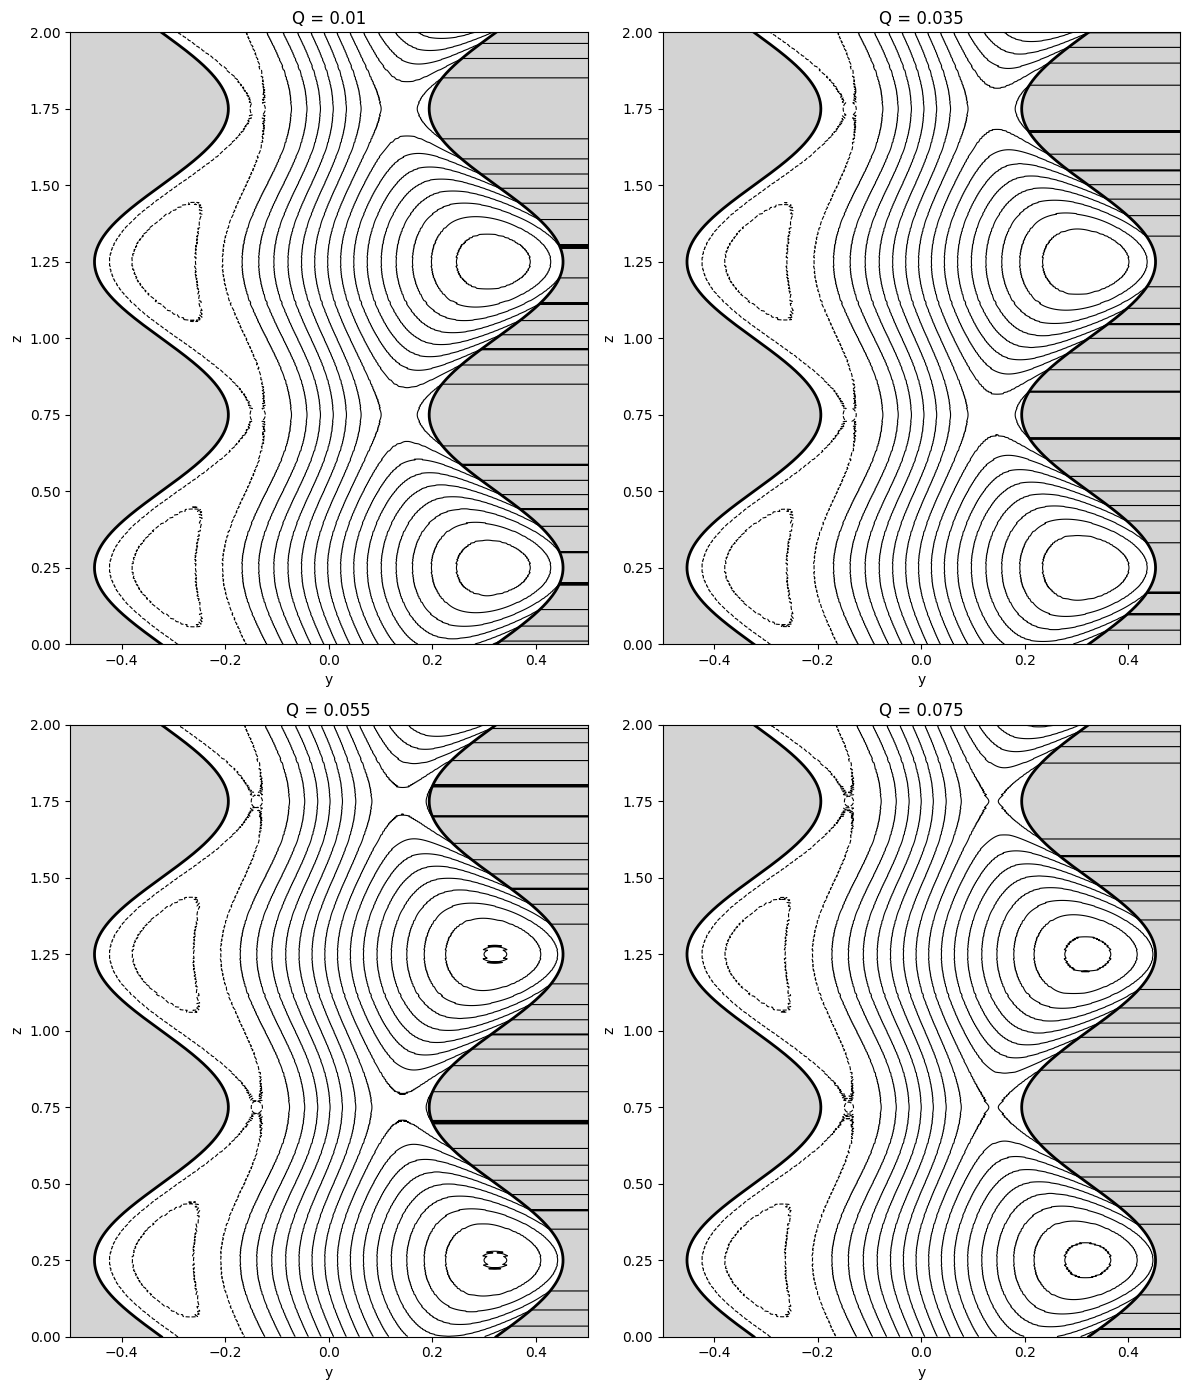

In [287]:
def get_geometry(z, delta=0.1, phi=0.4): 
    """Calculates semi-axes a and b."""
    e_squared = 1 - delta**2
    E_e = ellipe(e_squared)
    term = phi * np.sin(2 * np.pi * z)
    norm = E_e / np.pi
    a = norm * (1/delta + term)
    b = norm * (1 + term)
    return a, b

def get_fields_and_velocity(y_vals, z, Q, params):
    """
    Calculates the 1D velocity profile w(y) at x=0 for a given z.
    """
    a, b = get_geometry(z, params['delta'], params['phi'])
    

    x = 0
    
    shape = 1.0 - (y_vals**2 / b**2) # Since x=0
    mask = shape < 0
    shape[mask] = 0
    

    coeff_t = (params['gamma'] * a**2 * b**2) / (2 * (a**2 + b**2))
    theta = coeff_t * shape
    
    coeff_c = -(params['Sc'] * params['Sr'] * params['gamma'] * a**2 * b**2) / (2 * (a**2 + b**2))
    sigma = coeff_c * shape
    
 
    ellipse_term = (y_vals**2 / b**2) - 1.0 # Negative inside
    numerator = -1.0 * (a**2) * (b**2) * ellipse_term
    denominator = 2.0 * (a**2 + b**2)
    K = numerator / denominator
    K[mask] = 0
    
    x_int = np.linspace(-a, a, 30)
    y_int = np.linspace(-b, b, 30)
    X_int, Y_int = np.meshgrid(x_int, y_int)
    dA = (x_int[1]-x_int[0]) * (y_int[1]-y_int[0])
    
    shape_2d = (X_int**2/a**2) + (Y_int**2/b**2) - 1.0
    mask_2d = shape_2d > 0
    K_2d = (-1.0 * a**2 * b**2 * shape_2d) / (2*(a**2+b**2))
    K_2d[mask_2d] = 0
    
    shape_pos = 1.0 - (X_int**2/a**2 + Y_int**2/b**2)
    shape_pos[mask_2d] = 0
    theta_2d = coeff_t * shape_pos
    sigma_2d = coeff_c * shape_pos
    
    int_K = np.sum(K_2d) * dA
    buoyancy_term_2d = params['Gt']*theta_2d + params['Gc']*sigma_2d
    int_buoyancy = np.sum(K_2d * buoyancy_term_2d) * dA
    area = np.pi * a * b
    
    dp_dz = (int_buoyancy - area - Q) / int_K
    
    buoyancy_1d = params['Gt']*theta + params['Gc']*sigma
    driving = buoyancy_1d - dp_dz
    w = (K * driving) - 1.0
    w[mask] = np.nan # Outside wall
    
    return w, b

def calculate_streamlines_numerical(y_grid, z_vec, Q, params):
    Psi_matrix = np.full((len(z_vec), len(y_grid)), np.nan)

    for i, z in enumerate(z_vec):
        w_profile, b_wall = get_fields_and_velocity(y_grid, z, Q, params)

        u = w_profile

        valid = ~np.isnan(u)
        if not np.any(valid):
            continue

        yv = y_grid[valid]
        uv = u[valid]

        # Sort by y just in case
        order = np.argsort(yv)
        yv = yv[order]
        uv = uv[order]

        psi = cumulative_trapezoid(uv, yv, initial=0.0)


        Psi_matrix[i, valid] = psi[np.argsort(order)]  # put back in original valid order
        Psi_matrix[i, y_grid < -b_wall] = 0.0
        Psi_matrix[i, y_grid >  b_wall] = psi[-1]

    return Psi_matrix


# play around until we get what we want?
params_trap = {
    'delta': 0.1, 
    'phi': 0.4, 
    'gamma': 2,   
    'Gt': 0.1,       
    'Gc': 1,       
    'Sc': 1, 
    'Sr': 1
}
qs = [0.01, 0.035, 0.055, 0.075]

z_vec = np.linspace(0, 2.0, 1000) 
y_vec = np.linspace(-0.6, 0.6, 1000)
Y_grid, Z_grid = np.meshgrid(y_vec, z_vec)

fig, axes = plt.subplots(2, 2, figsize=(12, 14))
axes = axes.flatten()

print("Calculating exact streamlines (this may take a moment due to integration)...")

for i, Q_val in enumerate(qs):
    
    PSI = calculate_streamlines_numerical(y_vec, z_vec, Q_val, params_trap)
    
    _, b_wall = get_geometry(z_vec, params_trap['delta'], params_trap['phi'])
    

    ax = axes[i]
    ax.contour(Y_grid, Z_grid, PSI, levels=20, colors='black', linewidths=0.8)
    
    # Walls
    ax.plot(b_wall, z_vec, 'k-', linewidth=2)
    ax.plot(-b_wall, z_vec, 'k-', linewidth=2)
    ax.fill_betweenx(z_vec, b_wall, 0.6, color='lightgray')
    ax.fill_betweenx(z_vec, -0.6, -b_wall, color='lightgray')
    
    ax.set_title(f'Q = {Q_val}')
    ax.set_xlabel('y')
    ax.set_ylabel('z')
    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(0, 2.0)

plt.tight_layout()
plt.show()

## 7. Conclusion

In this replication of Nadeem et al. (2022), we successfully validated the exact analytical solutions for peristaltic transport in an elliptic duct. The model operates under the long wavelength $\lambda \gg a$ approximation,  and low Reynolds number $Re \to 0$, effectively reducing the governing Navier–Stokes and energy equations to a system of coupled linear Poisson equations.

The computational framework established here enables robust visualization of the parametric space ($G_t$, $G_c$, $S_c$, $S_r$), offering deeper insight into these coupled transport phenomena.
